# Importing Libraries and Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv("diabetes.csv", index_col=0)
data.head()

,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,,,,,,,,,,
0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Multiple Linear Regression

Create an X = iloc for the age, sex, bmi, bp, s1, s2, s3, s4, s5, s6 columns
Print out the array for the 10 columns

In [23]:
X = data.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
X[1:10]

array([[-4.46416365e-02, -5.14740612e-02, -2.63275281e-02,
        -8.44872411e-03, -1.91633397e-02,  7.44115641e-02,
        -3.94933829e-02, -6.83315471e-02, -9.22040496e-02,
         7.50000000e+01],
       [ 5.06801187e-02,  4.44512133e-02, -5.67042229e-03,
        -4.55994513e-02, -3.41944659e-02, -3.23559322e-02,
        -2.59226200e-03,  2.86130929e-03, -2.59303390e-02,
         1.41000000e+02],
       [-4.46416365e-02, -1.15950145e-02, -3.66560811e-02,
         1.21905688e-02,  2.49905934e-02, -3.60375700e-02,
         3.43088589e-02,  2.26877450e-02, -9.36191133e-03,
         2.06000000e+02],
       [-4.46416365e-02, -3.63846922e-02,  2.18723855e-02,
         3.93485161e-03,  1.55961395e-02,  8.14208361e-03,
        -2.59226200e-03, -3.19876395e-02, -4.66408736e-02,
         1.35000000e+02],
       [-4.46416365e-02, -4.06959405e-02, -1.94418262e-02,
        -6.89906499e-02, -7.92878444e-02,  4.12768238e-02,
        -7.63945038e-02, -4.11761669e-02, -9.63461565e-02,
         9.

Create an empty linear regression model like below and give it a good variable name such as diabetes_model.

Create the model we use fit(x,y)

Print the Intercept points of the diabetes model
Print the Co efficient points of the diabetes model

In [26]:
y = data.iloc[:,-1].values
y = y.reshape(-1, 1)
X = X.reshape(-1, 10)

diabetes_model = LinearRegression()

diabetes_model.fit(X,y)


print('Intercept: \n', diabetes_model.intercept_)
print('Coefficients: \n', diabetes_model.coef_)


Intercept: 
 [2.84217094e-14]
Coefficients: 
 [[ 2.59738215e-14 -4.24882352e-13  6.07456793e-15  1.30968782e-12
  -1.06265474e-12 -5.65329034e-13 -8.15094520e-14 -5.81755130e-13
   1.09079412e-14  1.00000000e+00]]


The above shows the Intercept point of 2.84 for the diabetes model

The above shows the Co efficient points of the diabetes model for the 10 columns of age, sex, bmi, bp, s1, s2, s3, s4, s5, s6.

# Training and test samples

From sklearn library import train_test split

Create X train and X test, y train and y test. Split this 80% training - 20% test.


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (353, 10) (353, 1)
Test data: (89, 10) (89, 1)


The above uses a 0.20 test size split our data of 442 items into a training set of 353 observations and 10 columns, and a test set of 89 observations in 10 columns.

We can now use this to evaluate our diabetes_model

# Feature Scaling

Let's Normalize our data using MinMaxScaler. Note that we fit it on the training set - we don't want to fit anything on the test set.

Fit the scaler on train data

In [28]:
sc = MinMaxScaler()
sc.fit(X_train)


MinMaxScaler()

Apply the scaler on train and test data

In [29]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fit the model on the training data

First we fit a model

In [30]:
lm= LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [31]:
y_test.shape

(89, 1)

Create line coordinates

In [32]:
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [25.]
Coefficients: 
 [[ 6.84735154e-14 -9.23705556e-14  8.17124146e-14 -6.89892588e-13
   4.06785716e-13  2.16715534e-13  1.06581410e-14  2.59348099e-13
  -1.45661261e-13  3.21000000e+02]]


The above shows the Intercept point of 25 for the Linear Regression model

The above shows the Co efficient points of the Linear Regression model for the 10 columns of age, sex, bmi, bp, s1, s2, s3, s4, s5, s6.

In [39]:
predictions[0:11]

array([[ 96.],
       [195.],
       [167.],
       [ 49.],
       [242.],
       [ 65.],
       [293.],
       [162.],
       [127.],
       [198.],
       [182.]])

# Plot the errors creating an error bar

(89, 1)

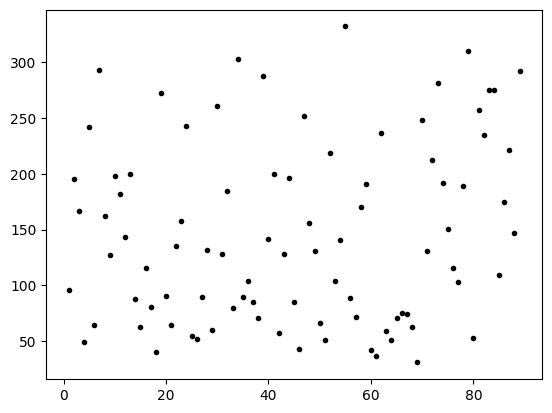

In [40]:
plt.errorbar(range(1,90), y_test.squeeze(), yerr=abs(y_test-predictions).squeeze() ,fmt='.k', ecolor="red");

y_test.shape

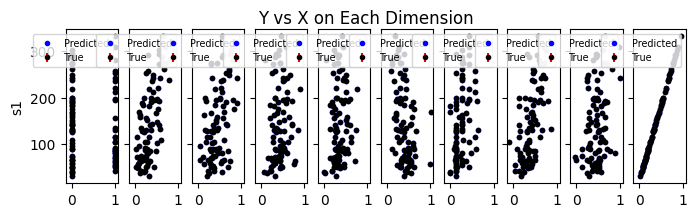

In [41]:
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(data.columns[3])

# Plot Line of Best Fit
# for i in range(X_test.shape[1]):
#     ax[i].plot(X_line[:,i], y_line[:,0])
#     ax[i].set_xlabel(data.columns[i])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot error bars (should be no error)
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

This should show red lines to indicate the error of the predication from the actual observations, however there is no red lines which is interesting.

Sklearn's LinearRegression provides the R squared score for its models:

In [37]:
print ("Score:", model.score(X_test, y_test))

Score: 1.0


This score is 1, which suggests that our model fits our observations really well and we should not use another model.